In [ ]:
!pip install coinmetrics 

In [ ]:
!pip install coinmetrics-api-client -U

In [3]:

from os import environ
import sys
import pandas as pd
import numpy as np
import logging
import seaborn as sns
from datetime import date, datetime, timedelta
from coinmetrics.api_client import CoinMetricsClient
from datetime import timezone as timezone_info
import matplotlib.pyplot as plt




In [4]:
# by default, using the community client
try:
    api_key = environ["CM_API_KEY"]
    logging.info("Using API key found in environment")
except KeyError:
    api_key = ""
    logging.info("API key not found. Using community client")


client = CoinMetricsClient(api_key)

In [5]:
assets = ['usdt', 'usdc', 'dai','busd','usdt_eth','usdt_trx'] 
asset_mapping = {i: assets[i] for i in range(len(assets))}
print(asset_mapping)

{0: 'usdt', 1: 'usdc', 2: 'dai', 3: 'busd', 4: 'usdt_eth', 5: 'usdt_trx'}


In [6]:
# https://docs.coinmetrics.io/info/metrics
metrics = ['PriceUSD']

In [7]:
from datetime import datetime, timedelta

date_interval=730
df = client.get_asset_metrics(
    assets = assets,
    metrics = metrics,
    start_time = (datetime.today() - timedelta(days= date_interval)).strftime('%Y-%m-%d'),
    end_time = datetime.today().strftime('%Y-%m-%d')
).to_dataframe()


# Data Exploration and Maniputalion
----

In [8]:
df

,asset,time,PriceUSD
0,busd,2021-03-14 00:00:00+00:00,0.999572
1,busd,2021-03-15 00:00:00+00:00,0.999842
2,busd,2021-03-16 00:00:00+00:00,0.999821
3,busd,2021-03-17 00:00:00+00:00,1.000137
4,busd,2021-03-18 00:00:00+00:00,1.000262
...,...,...,...
4375,usdt_trx,2023-03-09 00:00:00+00:00,0.99999
4376,usdt_trx,2023-03-10 00:00:00+00:00,1.003738
4377,usdt_trx,2023-03-11 00:00:00+00:00,1.007839
4378,usdt_trx,2023-03-12 00:00:00+00:00,1.007376


In [9]:
group_asset = df.groupby("asset")

In [10]:
group_asset.max()

,time,PriceUSD
asset,,
busd,2023-03-13 00:00:00+00:00,1.003857
dai,2023-03-13 00:00:00+00:00,1.002142
usdc,2023-03-13 00:00:00+00:00,1.001468
usdt,2023-03-13 00:00:00+00:00,1.007839
usdt_eth,2023-03-13 00:00:00+00:00,1.007839
usdt_trx,2023-03-13 00:00:00+00:00,1.007839


In [11]:
group_asset.min()

,time,PriceUSD
asset,,
busd,2021-03-14 00:00:00+00:00,0.996165
dai,2021-03-14 00:00:00+00:00,0.966993
usdc,2021-03-14 00:00:00+00:00,0.970648
usdt,2021-03-14 00:00:00+00:00,0.995427
usdt_eth,2021-03-14 00:00:00+00:00,0.995427
usdt_trx,2021-03-14 00:00:00+00:00,0.995427


All of the USDT prices are the same, so dropping eth and trx usdt's, I will later add them for marketcaps

In [12]:
#pivot table
df_pivot= df.pivot_table(index="asset", columns="time", values="PriceUSD")
df_pivot=df_pivot.drop('usdt_trx')
df_pivot=df_pivot.drop('usdt_eth')
df_pivot.tail()

time,2021-03-14 00:00:00+00:00,2021-03-15 00:00:00+00:00,2021-03-16 00:00:00+00:00,2021-03-17 00:00:00+00:00,2021-03-18 00:00:00+00:00,2021-03-19 00:00:00+00:00,2021-03-20 00:00:00+00:00,2021-03-21 00:00:00+00:00,2021-03-22 00:00:00+00:00,2021-03-23 00:00:00+00:00,...,2023-03-04 00:00:00+00:00,2023-03-05 00:00:00+00:00,2023-03-06 00:00:00+00:00,2023-03-07 00:00:00+00:00,2023-03-08 00:00:00+00:00,2023-03-09 00:00:00+00:00,2023-03-10 00:00:00+00:00,2023-03-11 00:00:00+00:00,2023-03-12 00:00:00+00:00,2023-03-13 00:00:00+00:00
asset,,,,,,,,,,,,,,,,,,,,,
busd,0.999572,0.999842,0.999821,1.000137,1.000262,1.000004,1.000187,0.999924,0.999755,1.000201,...,1.000026,0.999906,1.000046,0.999898,0.999918,1.000053,1.000506,1.000788,1.003857,1.001061
dai,1.002142,1.001835,1.001231,1.001449,1.001373,1.000624,1.00118,1.001127,1.001511,1.001111,...,0.999715,0.999777,0.999876,0.999828,0.999944,0.999901,0.999152,0.966993,0.99241,0.998771
usdc,0.99955,0.999521,0.99998,0.99967,0.99979,1.000002,1.000092,1.000016,1.000089,0.999992,...,0.999963,1.000015,0.999951,0.99987,1.000053,1.000005,0.996723,0.970648,0.991826,0.998857
usdt,0.999996,1.000079,1.000136,1.000114,0.999886,0.999973,1.000016,1.000309,1.000279,0.999953,...,1.000075,1.000065,0.999938,0.999971,0.999861,0.99999,1.003738,1.007839,1.007376,1.004173


In [13]:
df_pivot

time,2021-03-14 00:00:00+00:00,2021-03-15 00:00:00+00:00,2021-03-16 00:00:00+00:00,2021-03-17 00:00:00+00:00,2021-03-18 00:00:00+00:00,2021-03-19 00:00:00+00:00,2021-03-20 00:00:00+00:00,2021-03-21 00:00:00+00:00,2021-03-22 00:00:00+00:00,2021-03-23 00:00:00+00:00,...,2023-03-04 00:00:00+00:00,2023-03-05 00:00:00+00:00,2023-03-06 00:00:00+00:00,2023-03-07 00:00:00+00:00,2023-03-08 00:00:00+00:00,2023-03-09 00:00:00+00:00,2023-03-10 00:00:00+00:00,2023-03-11 00:00:00+00:00,2023-03-12 00:00:00+00:00,2023-03-13 00:00:00+00:00
asset,,,,,,,,,,,,,,,,,,,,,
busd,0.999572,0.999842,0.999821,1.000137,1.000262,1.000004,1.000187,0.999924,0.999755,1.000201,...,1.000026,0.999906,1.000046,0.999898,0.999918,1.000053,1.000506,1.000788,1.003857,1.001061
dai,1.002142,1.001835,1.001231,1.001449,1.001373,1.000624,1.00118,1.001127,1.001511,1.001111,...,0.999715,0.999777,0.999876,0.999828,0.999944,0.999901,0.999152,0.966993,0.99241,0.998771
usdc,0.99955,0.999521,0.99998,0.99967,0.99979,1.000002,1.000092,1.000016,1.000089,0.999992,...,0.999963,1.000015,0.999951,0.99987,1.000053,1.000005,0.996723,0.970648,0.991826,0.998857
usdt,0.999996,1.000079,1.000136,1.000114,0.999886,0.999973,1.000016,1.000309,1.000279,0.999953,...,1.000075,1.000065,0.999938,0.999971,0.999861,0.99999,1.003738,1.007839,1.007376,1.004173


In [14]:
df_pivot.head()

time,2021-03-14 00:00:00+00:00,2021-03-15 00:00:00+00:00,2021-03-16 00:00:00+00:00,2021-03-17 00:00:00+00:00,2021-03-18 00:00:00+00:00,2021-03-19 00:00:00+00:00,2021-03-20 00:00:00+00:00,2021-03-21 00:00:00+00:00,2021-03-22 00:00:00+00:00,2021-03-23 00:00:00+00:00,...,2023-03-04 00:00:00+00:00,2023-03-05 00:00:00+00:00,2023-03-06 00:00:00+00:00,2023-03-07 00:00:00+00:00,2023-03-08 00:00:00+00:00,2023-03-09 00:00:00+00:00,2023-03-10 00:00:00+00:00,2023-03-11 00:00:00+00:00,2023-03-12 00:00:00+00:00,2023-03-13 00:00:00+00:00
asset,,,,,,,,,,,,,,,,,,,,,
busd,0.999572,0.999842,0.999821,1.000137,1.000262,1.000004,1.000187,0.999924,0.999755,1.000201,...,1.000026,0.999906,1.000046,0.999898,0.999918,1.000053,1.000506,1.000788,1.003857,1.001061
dai,1.002142,1.001835,1.001231,1.001449,1.001373,1.000624,1.00118,1.001127,1.001511,1.001111,...,0.999715,0.999777,0.999876,0.999828,0.999944,0.999901,0.999152,0.966993,0.99241,0.998771
usdc,0.99955,0.999521,0.99998,0.99967,0.99979,1.000002,1.000092,1.000016,1.000089,0.999992,...,0.999963,1.000015,0.999951,0.99987,1.000053,1.000005,0.996723,0.970648,0.991826,0.998857
usdt,0.999996,1.000079,1.000136,1.000114,0.999886,0.999973,1.000016,1.000309,1.000279,0.999953,...,1.000075,1.000065,0.999938,0.999971,0.999861,0.99999,1.003738,1.007839,1.007376,1.004173


##CHARTS
----

Standard Deviation and Variation of Prices

  asset  Standard Deviation  Price Variation
0  busd            0.000337              0.0
1   dai            0.001359         0.000002
2  usdc            0.001155         0.000001
3  usdt            0.000744         0.000001


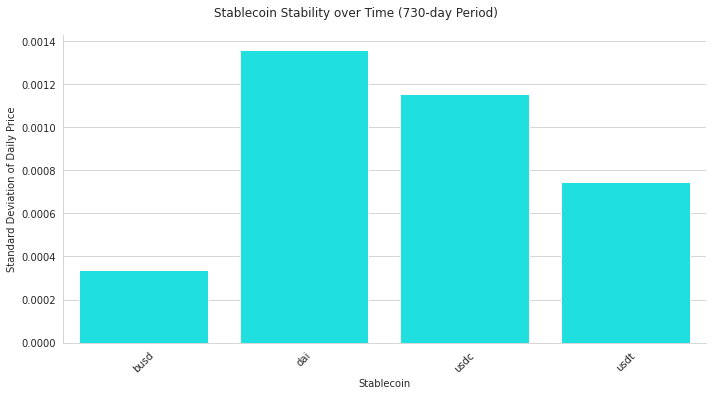

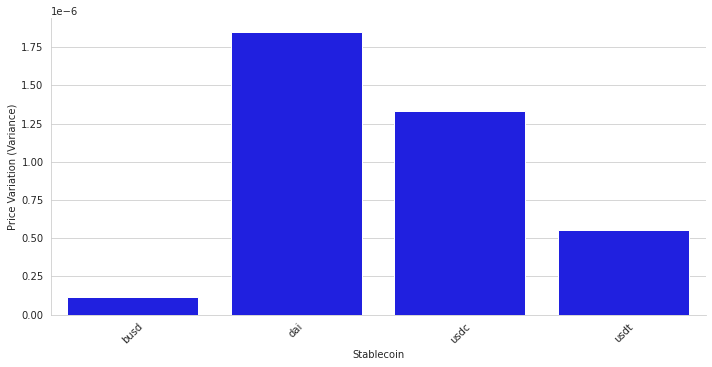

In [15]:
import seaborn as sns

#standard deviation and variation for each stablecoin
std_devs = df.groupby("asset")["PriceUSD"].std()
vars = df.groupby("asset")["PriceUSD"].var()

#new dataframe with the standard deviation and variation for each stablecoin
df_stablecoin = pd.DataFrame({'Standard Deviation': std_devs, 'Price Variation': vars}).reset_index()
df_stablecoin = df_stablecoin.drop(df_stablecoin[(df_stablecoin['asset'] == 'usdt_eth') | (df_stablecoin['asset'] == 'usdt_trx')].index)

print(df_stablecoin)
sns.set_style("whitegrid")
sns.set_palette("tab10")

#Plots
#bar graph for std dev and var
g = sns.catplot(
    data=df_stablecoin, kind="bar",
    x="asset", y="Standard Deviation", color='cyan', height=5, aspect=2
)

g2 = sns.catplot(
    data=df_stablecoin, kind="bar",
    x="asset", y="Price Variation", color='blue', height=5, aspect=2
)

g.set_axis_labels("Stablecoin", "Standard Deviation of Daily Price")
g.set_xticklabels(rotation=45)
g.fig.suptitle("Stablecoin Stability over Time ({}-day Period)".format(date_interval), y=1.05)

g2.set_axis_labels("Stablecoin", "Price Variation (Variance)")
g2.set_xticklabels(rotation=45)

plt.show()

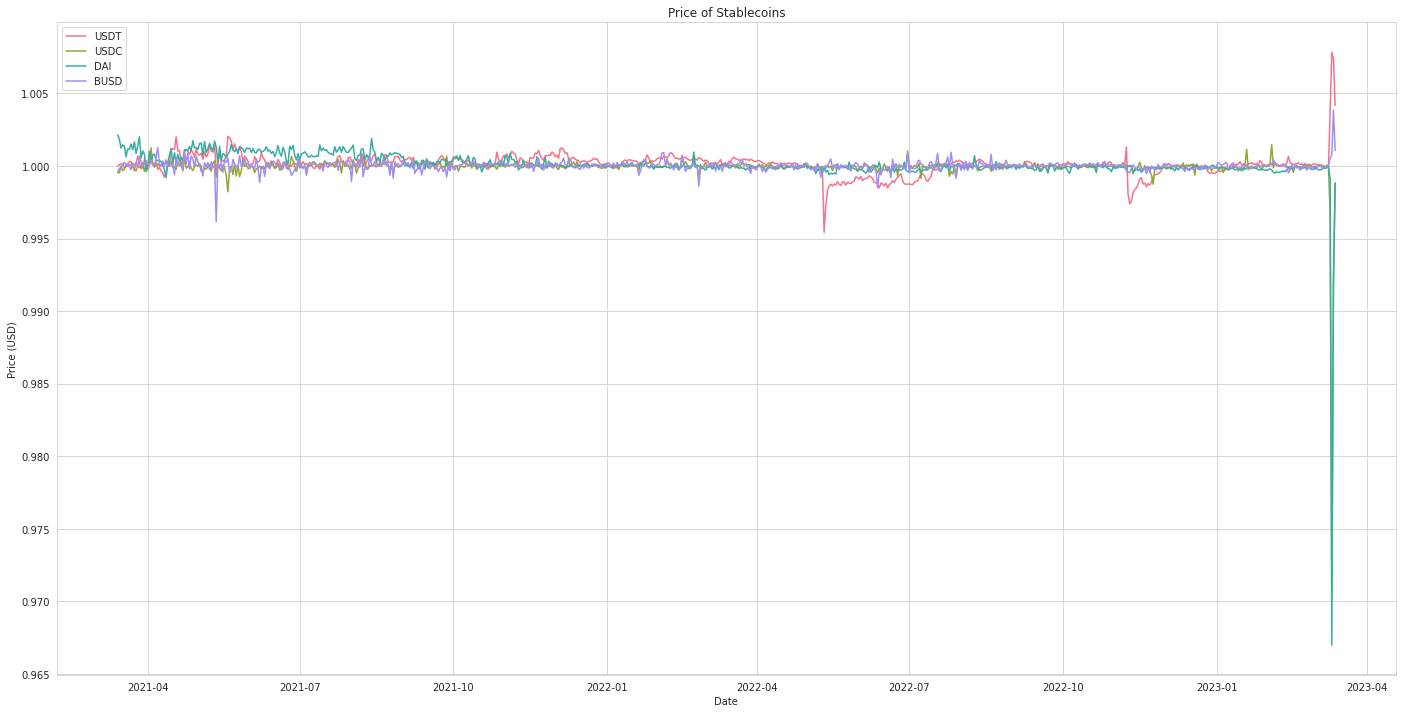

In [33]:
assets = ['usdt', 'usdc', 'dai','busd'] 

n_colors = len(assets)
colors = sns.color_palette("husl", n_colors)
fig, ax = plt.subplots(figsize=(24, 12))

for i, asset in enumerate(assets):
    ax.plot(df_pivot.columns, df_pivot.loc[asset], color=colors[i], label=asset.upper())

ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.set_title('Price of Stablecoins')
ax.legend()

plt.show()


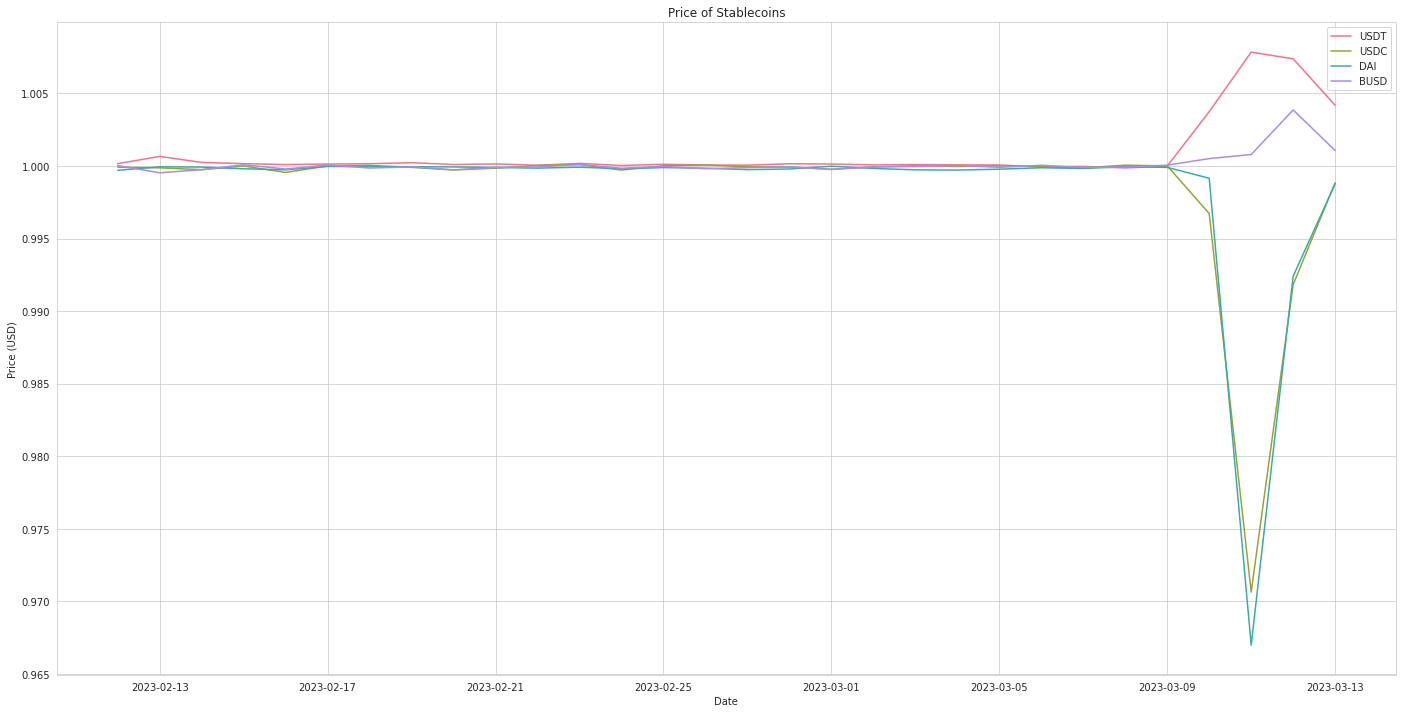

In [34]:
n_colors = len(assets)
colors = sns.color_palette("husl", n_colors)
fig, ax = plt.subplots(figsize=(24, 12))

for i, asset in enumerate(assets):
    ax.plot(df_pivot.columns[-30:], df_pivot.loc[asset][-30:], color=colors[i], label=asset.upper())

ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.set_title('Price of Stablecoins')
ax.legend()

plt.show()

# Gaussian Distribution

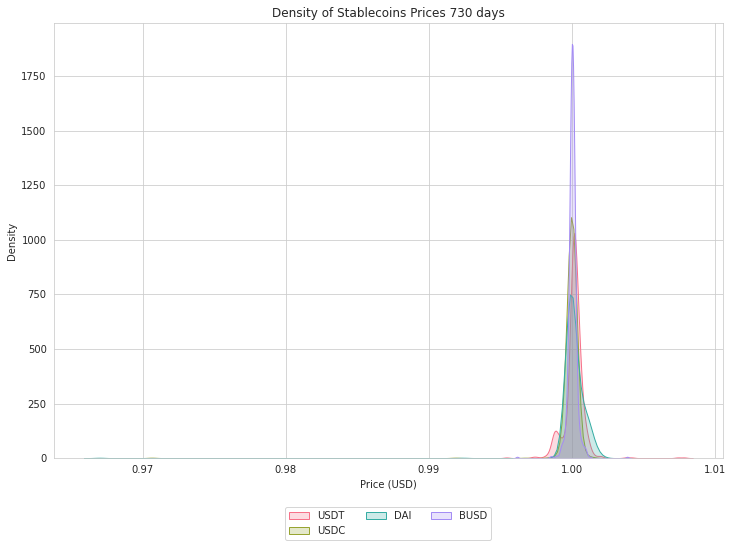

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
n_colors = len(assets)
colors = sns.color_palette("husl", n_colors)

for i, asset in enumerate(assets):
    sns.kdeplot(df[df["asset"]==asset]["PriceUSD"], shade=True, color=colors[i], label=asset.upper(), ax=ax)

ax.set_xlabel('Price (USD)')
ax.set_ylabel('Density')
ax.set_title('Density of Stablecoins Prices 730 days')
ax.legend()


ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()


## Same plot but for last 30 days 
USDC depeg (therefore DAI) can be seen more clearly

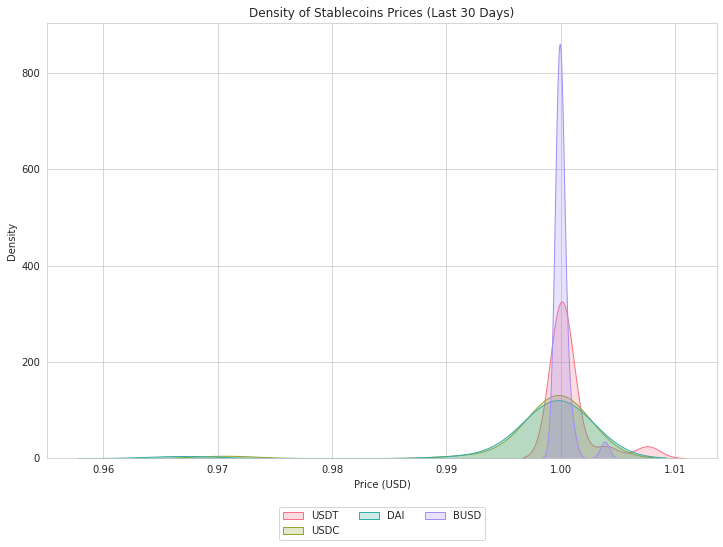

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
n_colors = len(assets)
colors = sns.color_palette("husl", n_colors)

for i, asset in enumerate(assets):
    # Use only the last 30 days of data for each asset
    data = df[df["asset"]==asset]["PriceUSD"].iloc[-30:]
    sns.kdeplot(data, shade=True, color=colors[i], label=asset.upper(), ax=ax)

ax.set_xlabel('Price (USD)')
ax.set_ylabel('Density')
ax.set_title('Density of Stablecoins Prices (Last 30 Days)')
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()


# Looking at Market Caps

Fetching Data for Market Caps

In [20]:
# Getting Market Caps
assets_mcap = client.catalog_metrics("CapMrktCurUSD")

asset_cap = ['usdc', 'usdt', 'busd', 'dai','usdt_eth','usdt_trx']
metrics = "CapMrktCurUSD"
frequency = "1d"
date_interval=1095 #3 years
df_caps = client.get_asset_metrics(
    assets=asset_cap,
    metrics=metrics,
    frequency=frequency,
    start_time = (datetime.today() - timedelta(days= date_interval)).strftime('%Y-%m-%d'),
    end_time = datetime.today().strftime('%Y-%m-%d')
).to_dataframe()


Data Exploraion and Manipulation

In [21]:
df_caps["time"] = pd.to_datetime(df_caps.time)
df_caps["CapMrktCurUSD"] = df_caps.CapMrktCurUSD.astype(int)

# Reshape dataset so assets are in columns, dates are the rows, and the values are prices
df_caps_pivot = df_caps.pivot(
    index="time",
    columns="asset",
    values="CapMrktCurUSD")
# summation of all usdt variables in one column
df_caps_pivot["usdt_total"] = df_caps_pivot["usdt"] + df_caps_pivot["usdt_eth"] + df_caps_pivot["usdt_trx"]
df_caps_pivot.tail()

asset,busd,dai,usdc,usdt,usdt_eth,usdt_trx,usdt_total
time,,,,,,,
2023-03-09 00:00:00+00:00,8401734575,4936370802,41016791726,887990827,32283571505,40132606721,73304169053
2023-03-10 00:00:00+00:00,8400666267,5091589375,40008591000,891319304,32404580770,40283036708,73578936782
2023-03-11 00:00:00+00:00,8403038097,5582187148,37697471898,894961079,32536980235,40447626169,73879567483
2023-03-12 00:00:00+00:00,8408231028,6310026739,38357682660,894550130,32522039872,40429053388,73845643390
2023-03-13 00:00:00+00:00,8384810276,6273531294,37387714153,891705729,32418629552,40300501140,73610836421


In [22]:
#dropping unnecessary usdt columns for more clear plotting
df_caps_new = df_caps_pivot.drop(columns=['usdt','usdt_eth','usdt_trx'])
df_caps_new.tail()

asset,busd,dai,usdc,usdt_total
time,,,,
2023-03-09 00:00:00+00:00,8401734575,4936370802,41016791726,73304169053
2023-03-10 00:00:00+00:00,8400666267,5091589375,40008591000,73578936782
2023-03-11 00:00:00+00:00,8403038097,5582187148,37697471898,73879567483
2023-03-12 00:00:00+00:00,8408231028,6310026739,38357682660,73845643390
2023-03-13 00:00:00+00:00,8384810276,6273531294,37387714153,73610836421


# Charts
Market Cap Graphs for 3 years and last 10 days

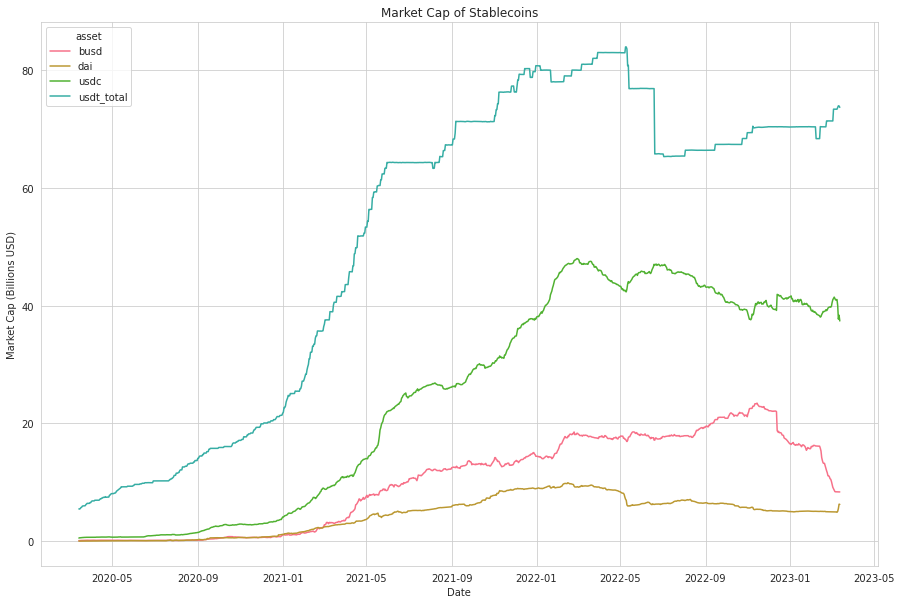

In [23]:
df_caps_pivot_bil = df_caps_new / 1000000000

fig, ax = plt.subplots(figsize=(15, 10))

sns.set_style("whitegrid")
sns.set_palette("husl")
sns.lineplot(data=df_caps_pivot_bil, dashes=False ,linewidth=1.5, ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Market Cap (Billions USD)',)
ax.set_title('Market Cap of Stablecoins')
plt.show()

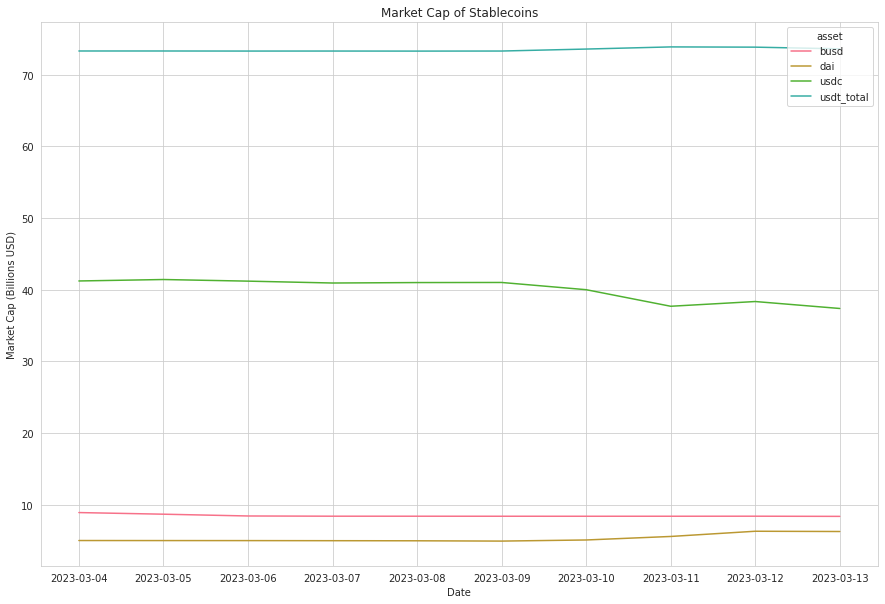

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.set_style("whitegrid")
sns.set_palette("husl")

#last 10 days
sns.lineplot(data=df_caps_pivot_bil[-10:], dashes=False ,linewidth=1.5, ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Market Cap (Billions USD)',)
ax.set_title('Market Cap of Stablecoins')
plt.show()
